![](logo_small.png)

###### Name -   Rohan Jadhav
##### Emailid :- jadhavrohan26@gmail.com¶

# Task 3 :- To Explore Unsupervised Machine Learning

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##### Dataset :- https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [2]:
import pandas as pd 
import numpy as np
from sklearn.cluster import k_means
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading data
iris  = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Our Dataset is extremely clean, we try to refine our dataset

In [6]:
# Shape of the Dataset.
print('\n''Shape of Iris Dataset:',iris.shape)


Shape of Iris Dataset: (150, 6)


In [7]:
#Check The of the Dataset Cloumns.
print('\n''Name of columns:-''\n',iris.columns)


Name of columns:-
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In Iris Dataframe the id column is gratuitous. So we will drop it.

In [8]:
iris.drop('Id',axis = 1, inplace = True)


To get quick overview of the dataset we use info() function. In pandas info() function is used to get concise summary of the dataframe.

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Now Check is there any Null value in our dataset. 

iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [12]:
#Now Check the Species of the flowers 

print(iris['Species'].unique())

print('\n''Quantity of the Species :-''\n''\n',iris['Species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Quantity of the Species :-

 Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


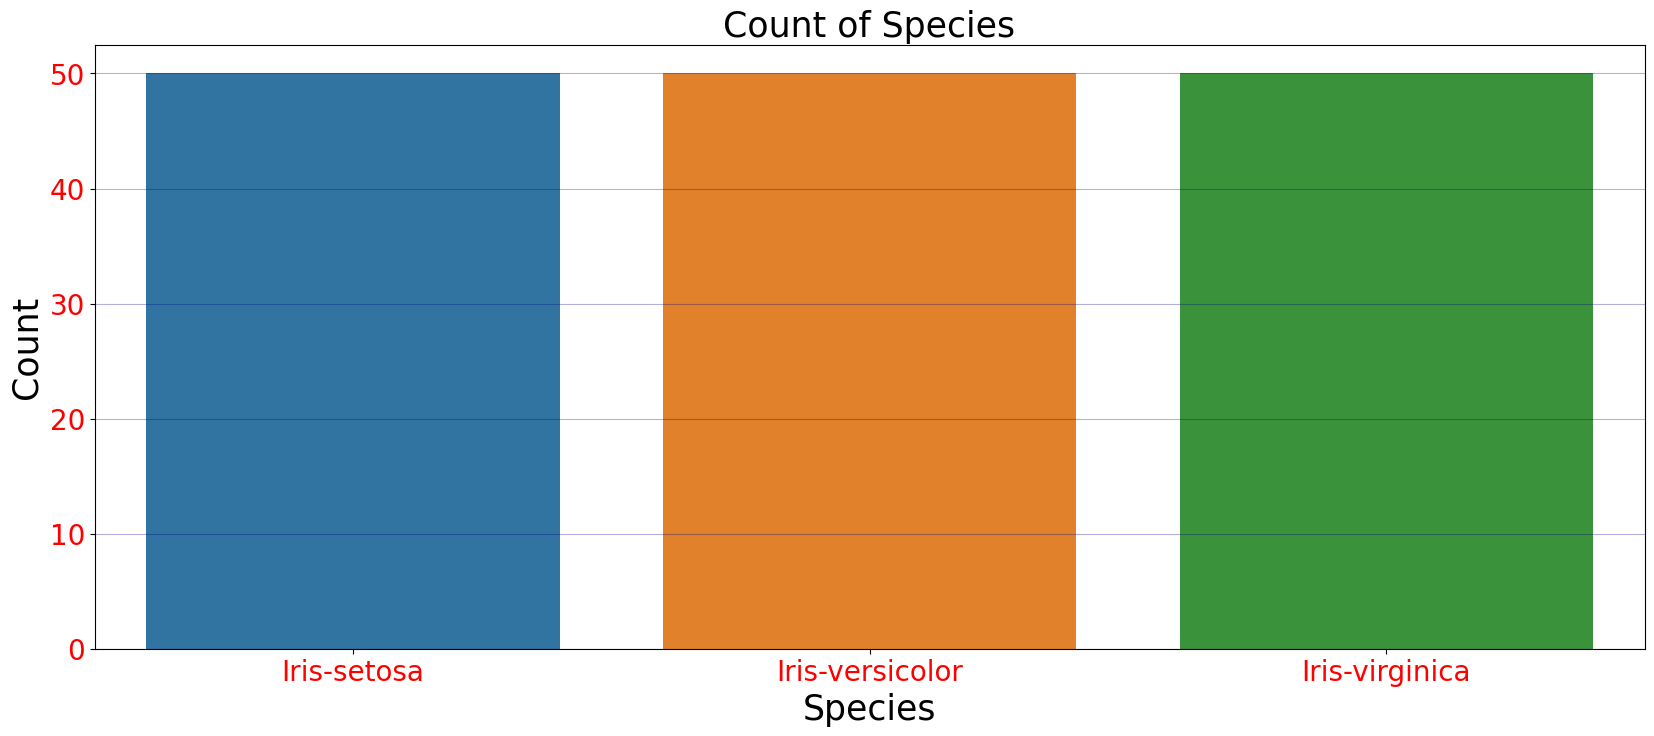

In [13]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.countplot('Species',data = iris)
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Count of Species',color='black',size = 25)
plt.xlabel('Species',color='black',size = 25)
plt.ylabel('Count',color='black',size = 25)

plt.show()

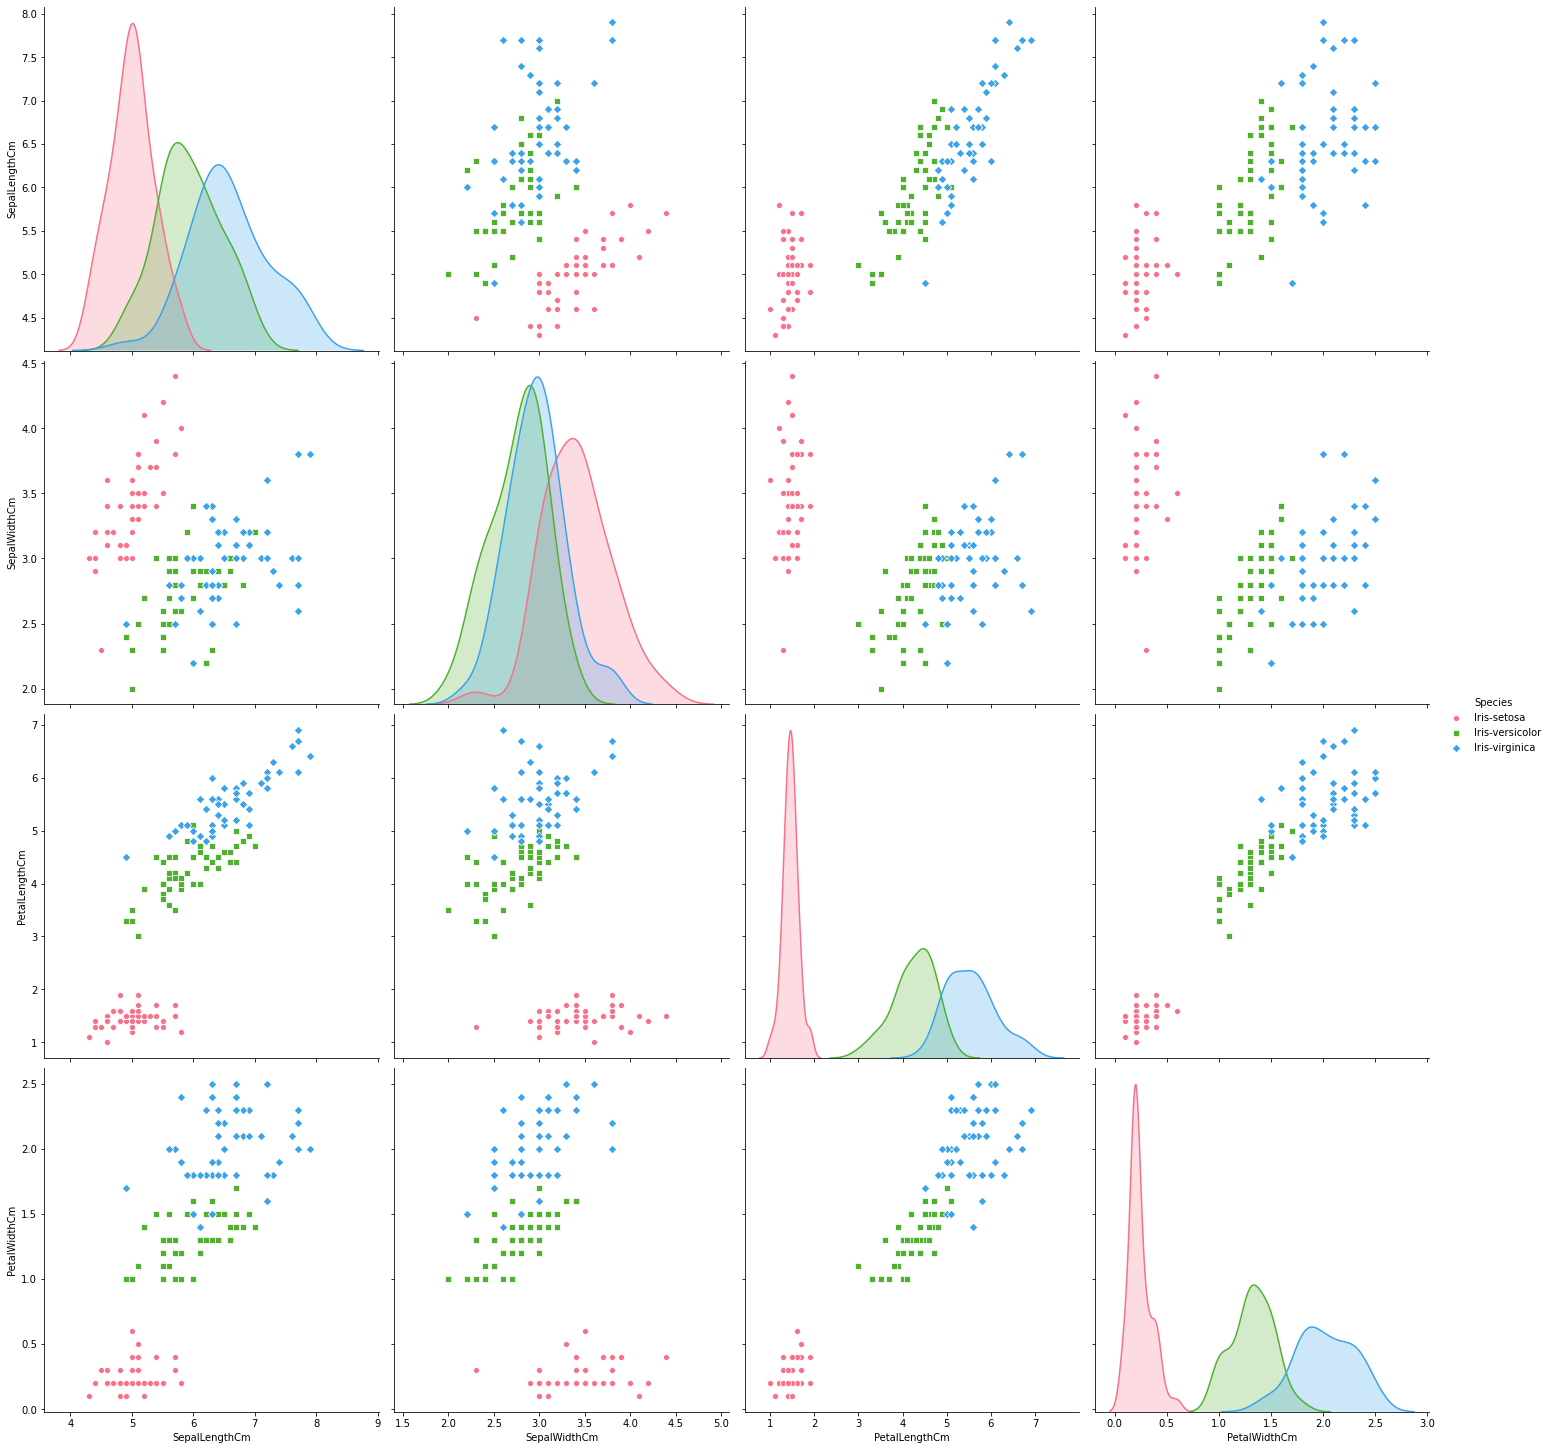

In [14]:
sea.pairplot(data = iris, hue = 'Species',palette="husl",markers=["o", "s", "D"],height=5)
plt.show()

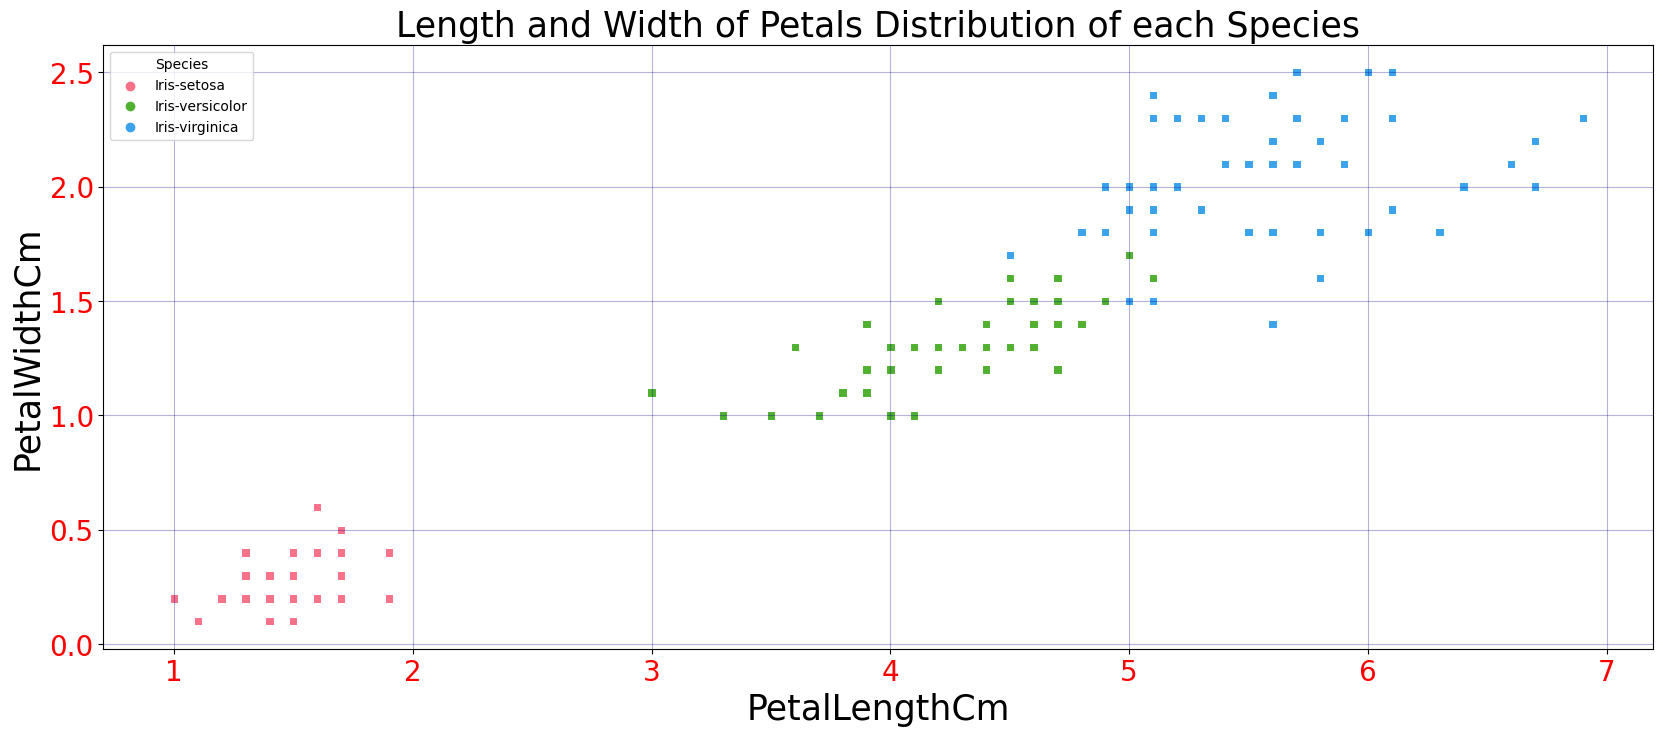

In [15]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Length and Width of Petals Distribution of each Species',color='black',size = 25)
plt.xlabel('PetalLengthCm',color='black',size = 25)
plt.ylabel('PetalWidthCm',color='black',size = 25)

plt.show()

###### If Petal Length is less than 2 and Width is less than 0.7 then Species is 'Setosa'.

###### If Petal Length is between 3 to 5.3 and Width is between 1.0 to 1.7 then Species is 'Versicolor'. 

###### If Petal Length is greater than 5.2 and Width is greater than 1.7 then Species is 'Virginica'.

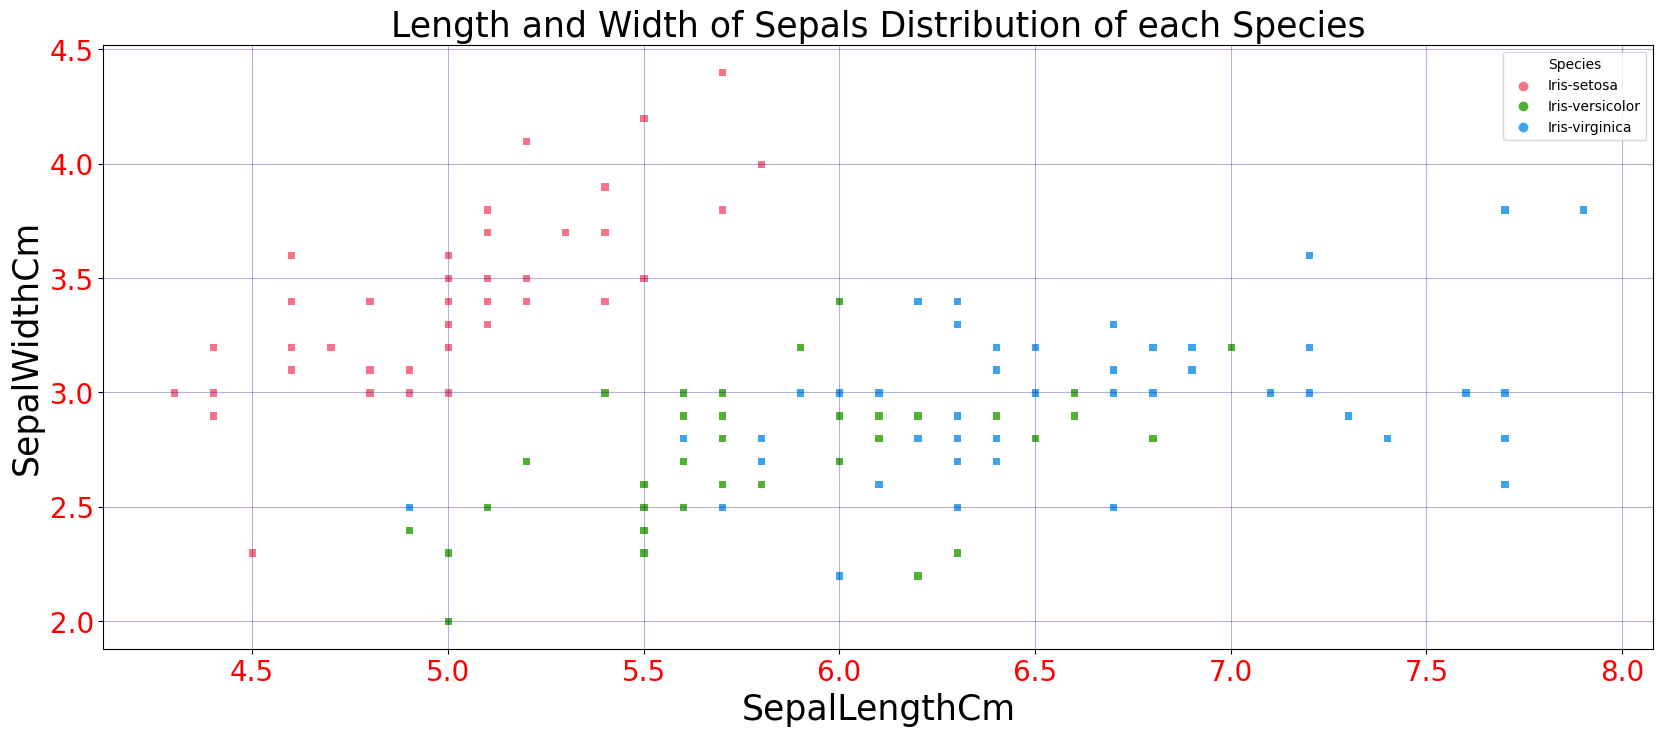

In [16]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.scatterplot(x = iris['SepalLengthCm'], y = iris['SepalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Length and Width of Sepals Distribution of each Species',color='black',size = 25)
plt.xlabel('SepalLengthCm',color='black',size = 25)
plt.ylabel('SepalWidthCm',color='black',size = 25)

plt.show()

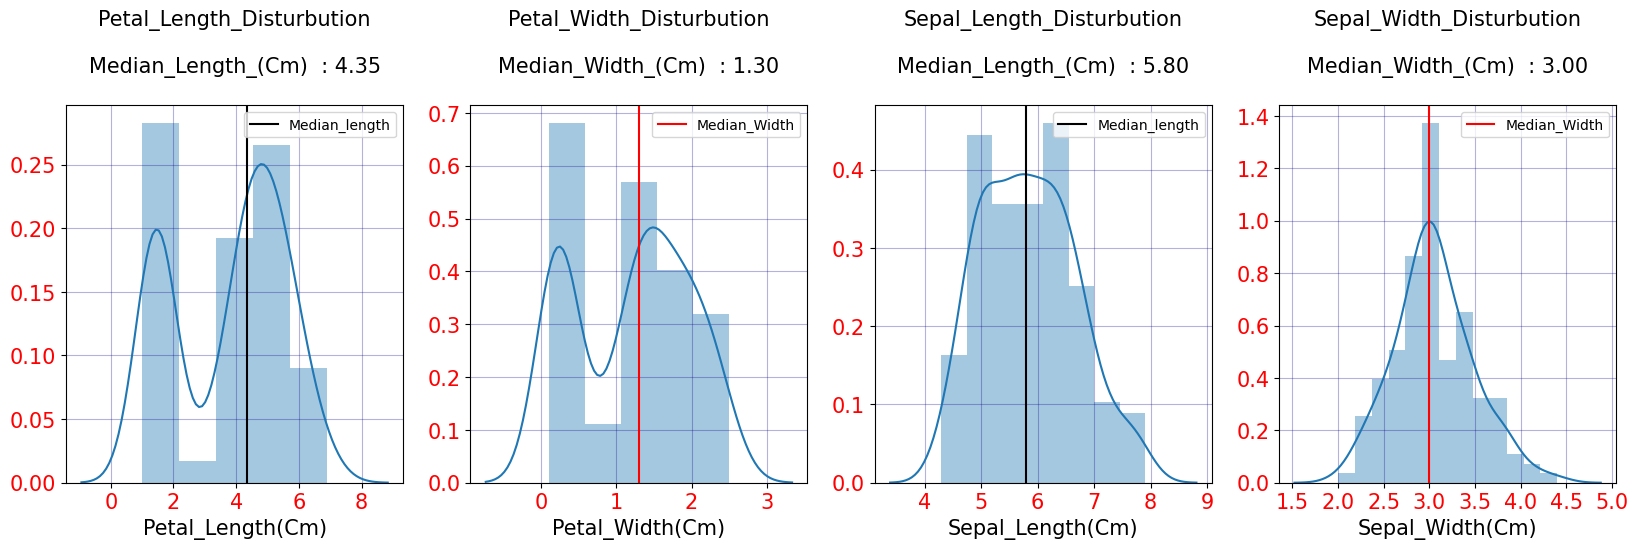

In [17]:
Fig = plt.figure(figsize = (20,5), dpi = 100)
Axis1 = plt.subplot(1, 4, 1)

g = sea.distplot(iris['PetalLengthCm'], ax=Axis1)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis1.set_xlabel('Petal_Length(Cm)' ,color='black',size = 15)
Axis1.set_title('Petal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['PetalLengthCm'].median()),color='black',size = 15)
g.axvline(iris['PetalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis1.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis2 = plt.subplot(1, 4, 2)
g = sea.distplot(iris['PetalWidthCm'], ax=Axis2)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis2.set_xlabel('Petal_Width(Cm)' ,color='black',size = 15)
Axis2.set_title('Petal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['PetalWidthCm'].median()),color='black',size = 15)
g.axvline(iris['PetalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis2.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis3 = plt.subplot(1, 4, 3)
g = sea.distplot(iris['SepalLengthCm'], ax=Axis3)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis3.set_xlabel('Sepal_Length(Cm)' ,color='black',size = 15)
Axis3.set_title('Sepal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['SepalLengthCm'].median()),color='black',size = 15)
g.axvline(iris['SepalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis3.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)


Axis4 = plt.subplot(1, 4, 4)
g = sea.distplot(iris['SepalWidthCm'], ax=Axis4)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis4.set_xlabel('Sepal_Width(Cm)' ,color='black',size = 15)
Axis4.set_title('Sepal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['SepalWidthCm'].median()),color='black',size = 15)
g.axvline(iris['SepalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis4.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.show()

##### Unsupervised Machine Learning Modal

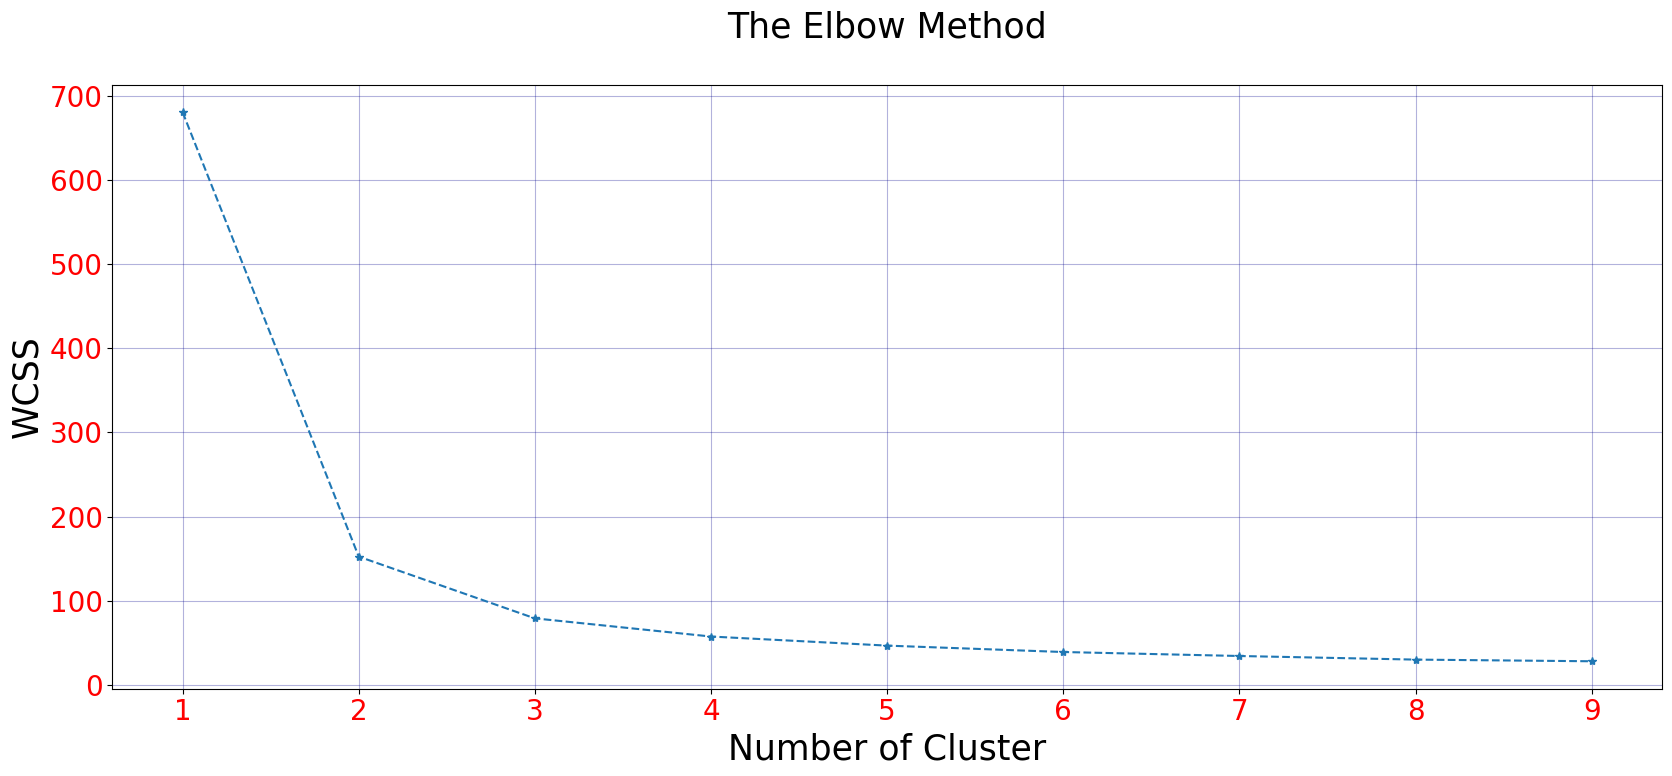

In [18]:
#Finding the optimum number of cluster for K-Means Cluster
x = iris.iloc[:, 0:4].values

from sklearn.cluster import KMeans
WCSS = []

for  i in range(1,10):
  Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  Kmeans.fit(x)
  WCSS.append(Kmeans.inertia_)


plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.plot(range(1,10),WCSS,'*--')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('The Elbow Method' '\n',color='black',size = 25)
plt.xlabel('Number of Cluster',color='black',size = 25)
plt.ylabel('WCSS',color='black',size = 25)


plt.show()


The Elbow method is used to determine the optimal number of clusters in k-means clustering. The Elbow method plots the values of the cost function produced by different values of K.

From Elbow method, we see that the second bend on the diagram is at K=3.

In [19]:
Kmeans = KMeans(n_clusters = 3, init = 'k-means++' , max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = Kmeans.fit_predict(x)
iris['Prediction'] = y_kmeans

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


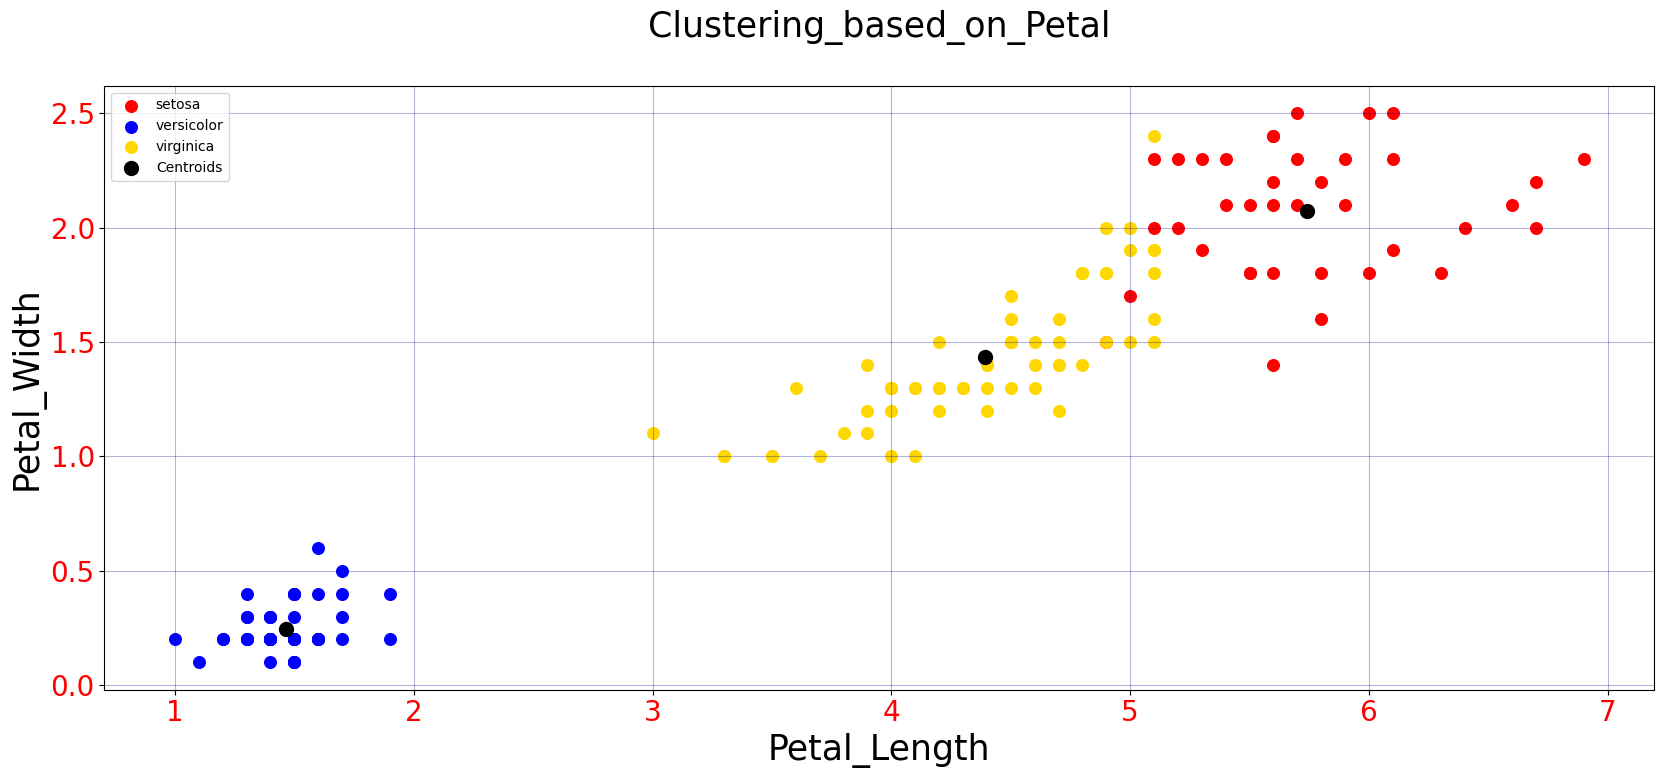

In [20]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s= 70, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s= 70, c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s= 70, c = 'gold', label = 'virginica')

plt.scatter(Kmeans.cluster_centers_[:, 2], Kmeans.cluster_centers_[:, 3], s = 100, c = 'black', label = 'Centroids')

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Clustering_based_on_Petal' '\n', color='black',size = 25)
plt.xlabel('Petal_Length', color='black', size = 25)
plt.ylabel('Petal_Width', color='black', size = 25)
plt.legend()
plt.show()

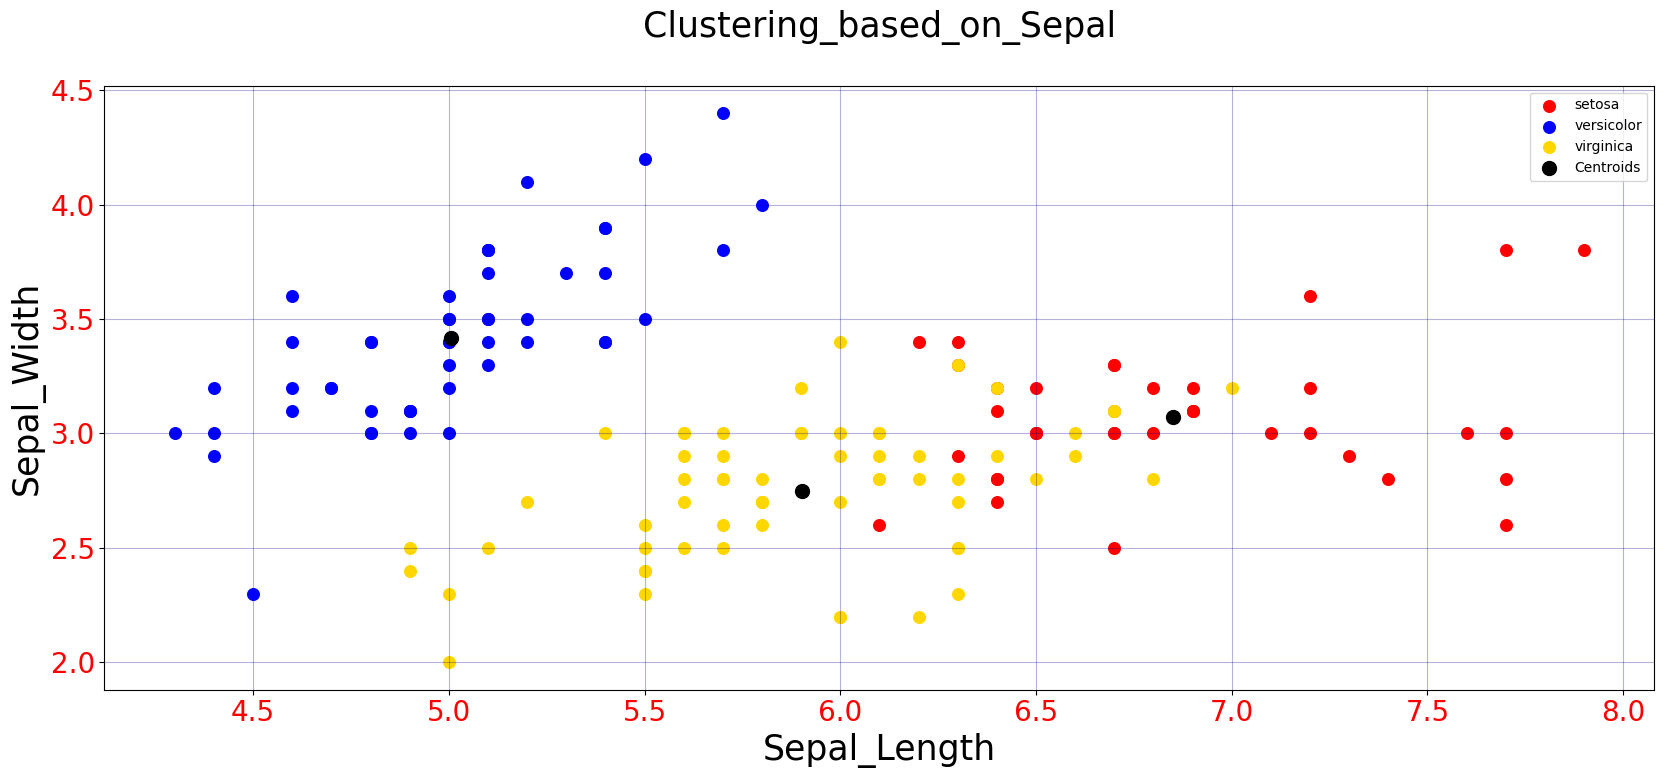

In [21]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 70, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 70, c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 70, c = 'gold', label = 'virginica')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Clustering_based_on_Sepal' '\n', color='black',size = 25)
plt.xlabel('Sepal_Length', color='black', size = 25)
plt.ylabel('Sepal_Width', color='black', size = 25)
plt.legend()
plt.show()

In [22]:
confusion_matrix(iris['Prediction'],y_kmeans)

array([[38,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 62]], dtype=int64)

##### Conclusion

As we can see using K-Means clustering, we could label most of the clusters correctly. Some of the points couldnot be classified correctly. However,majority of the points could be segmented accurately. Hence, Unsupervised learning such as K-Means cluster can be really benefical when we don't have the labels.